FTYPE for StreamRiver = 460
FCODE 

      46003 = Intermittent

      46006 = Perennial
      
      46007 = Ephemeral 


FTYPE for ArtificialPath = 558

FCODE 55800 = ArtificalPath


FTYPE for Connector = 334

FCODE 33400 = Connector

FTYPE for CoastLine = 556

FCODE 56600 = CoastLine

FTYPE for CanalDitch = 33600

FCODE 33600 = CanalDitch


In [4]:
import rioxarray
import xrspatial
import geopandas as gpd
from pygeohydro import WBD
import py3dep
from pynhd import HP3D
from pynhd import NHD
import pynhd
import matplotlib.pyplot as plt

In [10]:
def get_dem_and_flowlines(huc10):
    print('water boundary')
    wbd = WBD("huc10")
    boundary = wbd.byids("huc10", huc10)
    boundary.iloc[0]['geometry']
    boundary_reprojected = boundary.to_crs(3310)

    print('getting dem')
    dem = py3dep.get_map("DEM", boundary.geometry.iloc[0], resolution=10, geo_crs=boundary.crs, crs=4326)
    dem = dem.rio.reproject(3310)

    print('flowlines medium resolution')
    nhd_mr = NHD("flowline_mr")
    flowlines_mr = nhd_mr.bygeom(boundary.geometry.iloc[0].bounds)
    flowlines_mr = flowlines_mr.to_crs(3310)
    flowlines_mr = flowlines_mr.clip(boundary_reprojected.geometry.iloc[0])

    print('flowlines high resolution')
    nhd_hr = NHD("flowline_hr")
    flowlines_hr = nhd_hr.bygeom(boundary.geometry.iloc[0].bounds)
    flowlines_hr = flowlines_hr.to_crs(3310)
    flowlines_hr = flowlines_hr.clip(boundary_reprojected.geometry.iloc[0])
    
    return dem, flowlines_mr, flowlines_hr

def get_terrain(dem):
    hillshade = xrspatial.hillshade(dem)
    slope = xrspatial.slope(dem)
    curvature = xrspatial.slope(dem)
    return hillshade, slope, curvature

In [36]:
# Start with HR flowlines
# for each flowline merge with -- https://www.sciencebase.gov/catalog/item/60c92503d34e86b9389df1c9.  (enhd_attrs)
# merge with VAA -- https://www.hydroshare.org/resource/6092c8a62fac45be97a09bfd0b0bf726/.   (nhdplus_vaa)
# flowline to linestring 
# filter
# split
# <get catchment/hillslopes?>
# get valley floor


# not doing network analysis so don't really care about connectivity and removing isolated networks

In [11]:
huc10 = 1806000601
dem, mr, hr = get_dem_and_flowlines(huc10)
hillshade, slope, curvature = get_terrain(dem)

water boundary
getting dem


/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xarray/core/dataarray.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xarray/core/dataarray.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xarray/core/dataarray.py:905: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


flowlines medium resolution
flowlines high resolution


/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:23: RuntimeWarning: invalid value encountered in sin
  shaded = np.sin(altituderad) * np.sin(slope) + \
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:24: RuntimeWarning: invalid value encountered in cos
  np.cos(altituderad) * np.cos(slope) * \
/Users/arthurkoehl/Library/Caches/pypoetry/virtualenvs/valleys-apqonAG6-py3.10/lib/python3.10/site-packages/xrspatial/hillshade.py:25: RuntimeWarning: invalid value encountered in cos
  np.cos((azimuthrad - np.pi/2.) - aspect)


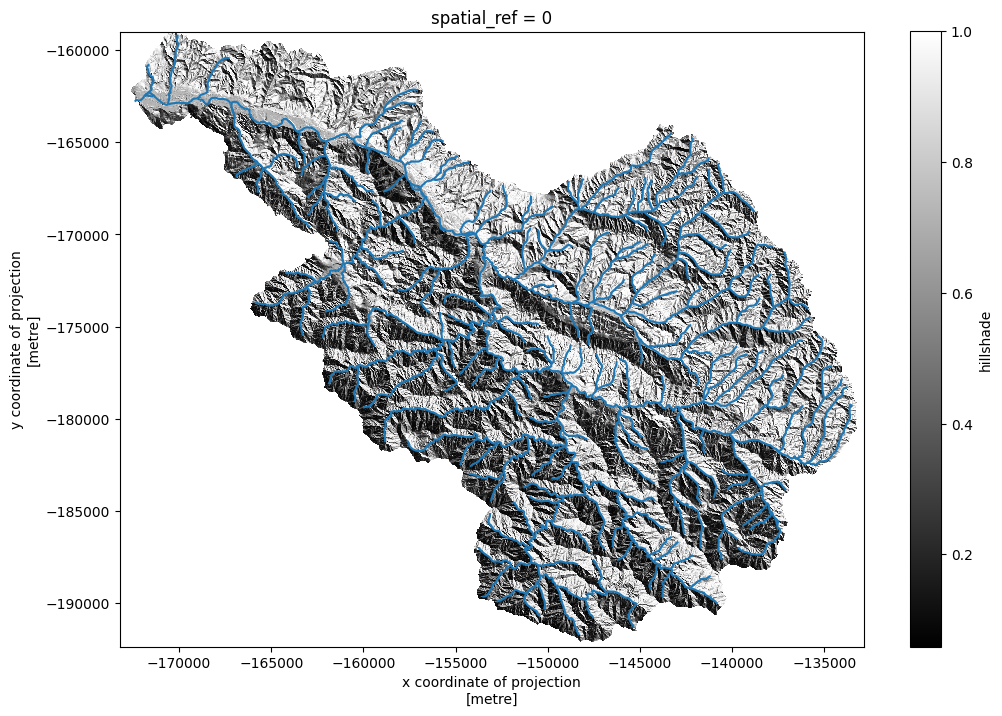

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
mr.plot(ax=ax)
hillshade.plot(ax=ax, cmap='gray')

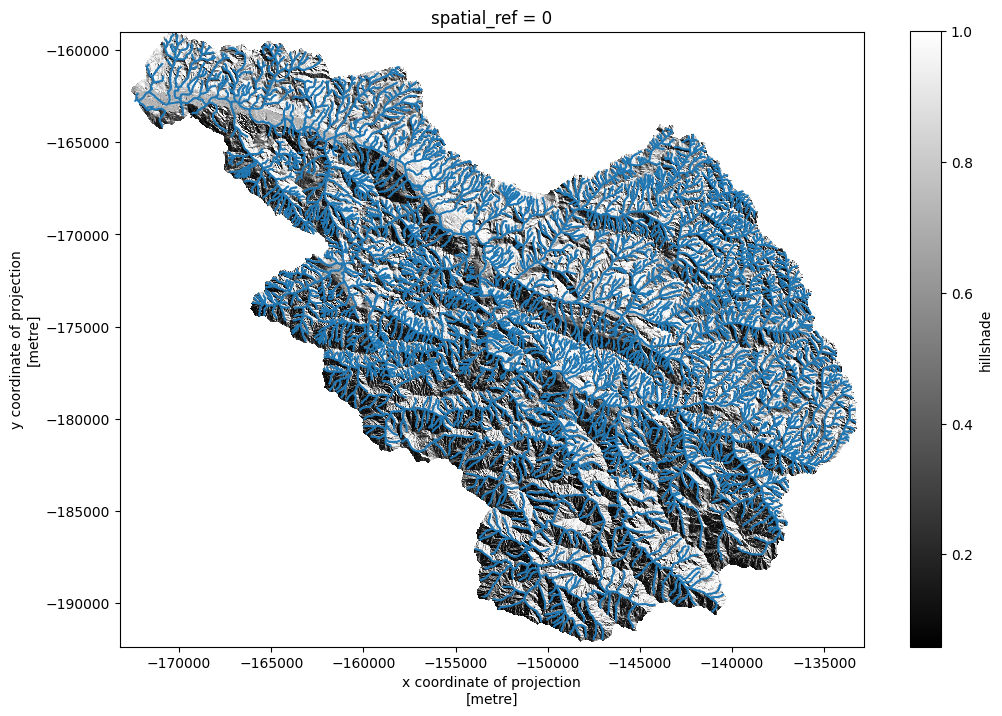

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
hr.plot(ax=ax)
hillshade.plot(ax=ax, cmap='gray')

In [14]:
len(mr), len(hr)

(440, 5755)

In [15]:
from pynhd import prepare_nhdplus

In [20]:
# cant seem to use prepare_nhdplus out of the box due to no 'append' for geodataframe and missing columns in hr data
#

# to linestring
# clean_flowlines
# ?remove terminal?
# ?remove non dendritic?
# remove tiny
# add to comid
# remove isolated

AttributeError: 'GeoDataFrame' object has no attribute 'append'

In [35]:
# flowlines
#. NHDPlus Attributes (enhd? epa nhd?)
#. Value Added Attributes
#. StreamCat

# which ones do I care about?

Index(['geometry', 'OBJECTID', 'permanent_identifier', 'fdate', 'resolution',
       'gnis_id', 'gnis_name', 'lengthkm', 'reachcode', 'flowdir',
       'wbarea_permanent_identifier', 'ftype', 'fcode', 'innetwork',
       'mainpath', 'visibilityfilter', 'Shape_Length', 'globalid'],
      dtype='object')

<Axes: >

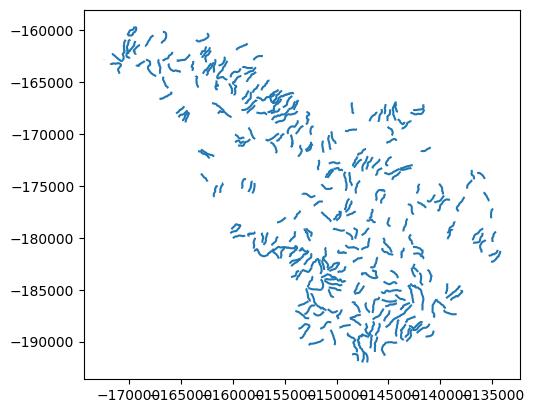

In [34]:
hr.loc[hr['lengthkm'] > 1].plot()
# convert flowlines to line segments
# set column names to lowercase
# remove all first order streams of length less than 1km
# remove all lengths that aren't streams
# get additional attributes (stream slope, upstream area?, confinement, catchment+hillslopes+pour point?)

In [22]:
# FTYPE for StreamRiver = 460
# FCODE 46003 = Intermittent
#.      46006 = Perennial
#.      46007 = Ephemeral


# FTYPE for ArtificialPath = 558
# FCODE 55800 = ArtificalPath
#

# FTYPE for Connector = 334
# FCODE 33400 = Connector

# FTYPE for CoastLine = 556
# FCODE 56600 = CoastLine

# FTYPE for CanalDitch = 33600
# FCODE 33600 = CanalDitch

In [25]:
# get flowlines, filter to just be streams, filter to perennial
# plot on the dem
# get network -> hand, curve, slope
# cross sections -> breakpoints
# for each segment breakpoints -> polygon
# for each segment have a polygon
# for each segment get hillslopes (is there a way to get catchments for NHD?)


# how to sample this? terrain type, upstream area X slope, confinement

In [1]:
perennial = flowlines.loc[flowlines['fcode'].isin([46006, 46003])]
perennial.plot(cmap='rainbow')

NameError: name 'flowlines' is not defined

In [ ]:
# use pynhd tools to prepare the network
# get attributes for each segment for sampling (terrain type, slope/drainage area, confinement)

# read through the tools to see what I want
# potentially download the whole NHDPlus dataset using the function provided
# then sample reaches
# use the tool to get cross sections of the network